In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.shape

(15509, 10)

In [7]:
df.duplicated().sum()

np.int64(6)

In [8]:
# Drop duplicate values
df.drop_duplicates(inplace = True)

In [9]:
# Shape of the dataset after removing duplicate values
df.shape

(15503, 10)

In [10]:
# Percentage of null values in each column
df.isna().mean()*100

Name         0.000000
Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
dtype: float64

In [11]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [12]:
df.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [13]:
df['Year'] = df['Year'].str.replace('(','').str.replace(')','')

In [14]:
df.Year.unique()

array([nan, '2019', '2021', '2010', '1997', '2005', '2008', '2012',
       '2014', '2004', '2016', '1991', '1990', '2018', '1987', '1948',
       '1958', '2017', '2020', '2009', '2002', '1993', '1946', '1994',
       '2007', '2013', '2003', '1998', '1979', '1951', '1956', '1974',
       '2015', '2006', '1981', '1985', '2011', '2001', '1967', '1988',
       '1995', '1959', '1996', '1970', '1976', '2000', '1999', '1973',
       '1968', '1943', '1953', '1986', '1983', '1989', '1982', '1977',
       '1957', '1950', '1992', '1969', '1975', '1947', '1972', '1971',
       '1935', '1978', '1960', '1944', '1963', '1940', '1984', '1934',
       '1955', '1936', '1980', '1966', '1949', '1962', '1964', '1952',
       '1933', '1942', '1939', '1954', '1945', '1961', '1965', '1938',
       '1941', '1931', '1937', '2022', '1932', '1923', '1915', '1928',
       '1922', '1917', '1913', '1930', '1926', '1914', '1924'],
      dtype=object)

In [15]:
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [16]:
df['Duration'] = df['Duration'].str.replace(' min','')

In [17]:
df['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [18]:
df['Votes'] = df['Votes'].str.replace(",","")

In [19]:
df = df[df['Votes'] != '$5.16M']

###Change the dtype of 'Year','Duration' and 'Votes'

In [20]:
col = ['Year','Duration','Votes']
df[col] = df[col].apply(pd.to_numeric, errors='coerce')

In [21]:
df.describe()

,Year,Duration,Rating,Votes
count,14975.000000,7239.000000,7919.000000,7919.000000
mean,1987.005409,128.127918,5.841621,1938.520394
std,25.417866,28.914476,1.381777,11602.415952
min,1913.000000,2.000000,1.100000,5.000000
25%,1968.000000,110.000000,4.900000,16.000000
50%,1991.000000,131.000000,6.000000,55.000000
75%,2009.000000,147.000000,6.800000,404.000000
max,2022.000000,321.000000,10.000000,591417.000000


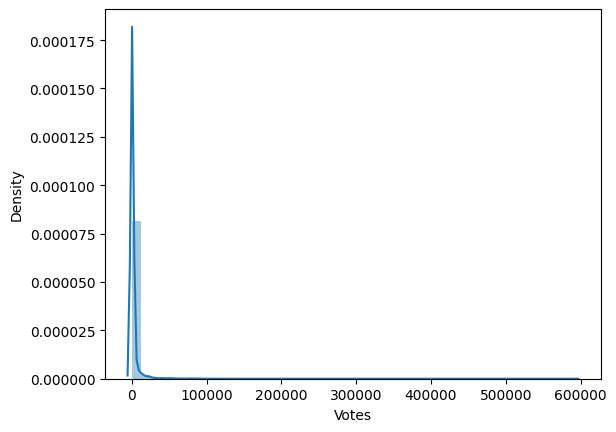

In [22]:
sns.distplot(df['Votes'])
plt.show()

In [23]:
# Apply log transformation because it is skewed
df['Votes'] = np.log1p(df['Votes'])

<Axes: xlabel='Votes', ylabel='Density'>

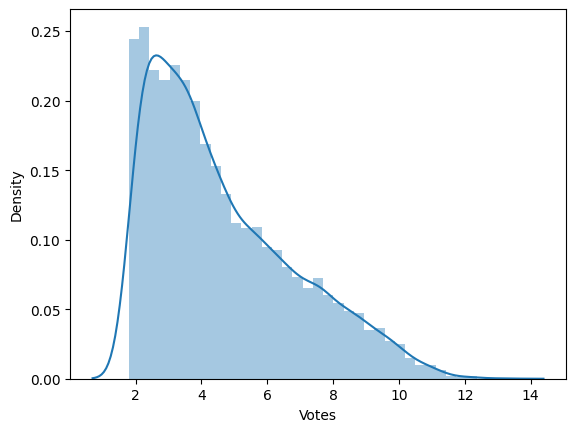

In [24]:
sns.distplot(df['Votes'])

<Axes: xlabel='Rating', ylabel='Density'>

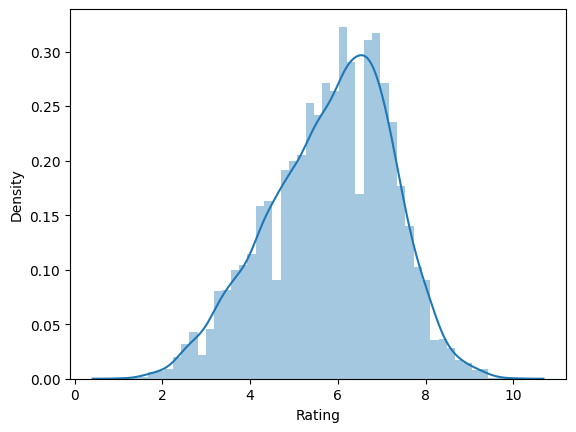

In [25]:
sns.distplot(df['Rating'])

In [26]:
df.dtypes

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

### Handling missing values in Genre

In [27]:
df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

In [28]:
df_exploded['Genre'].value_counts()

Genre
Drama          7242
Action         3542
Romance        2449
Comedy         2028
Thriller       1711
Crime          1321
Family          943
Musical         589
Adventure       541
Horror          524
Mystery         513
Fantasy         458
Documentary     383
Biography       208
History         207
Animation       125
Music            90
Sport            70
Sci-Fi           58
War              47
News              9
Western           5
Reality-TV        3
Short             1
Name: count, dtype: int64

### Maximum movies are drama

In [29]:
df_exploded['Genre'] = df_exploded['Genre'].fillna('Drama')

In [30]:
df_exploded['Genre'].isna().sum()

np.int64(0)

In [31]:
df['Genre'].isna().sum()

np.int64(1876)

### Remove null values from Genre

In [32]:
categorical_col = [col for col in df.columns if df[col].dtype == 'object']
numerical_col = [col for col in df.columns if df[col].dtype != 'object']

In [33]:
categorical_col

['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

In [34]:
numerical_col

['Year', 'Duration', 'Rating', 'Votes']

### Label encoding

In [35]:
# Replace nan value with -1
column = ['Director','Actor 1','Actor 2','Actor 3']
df[column] = df[column].fillna('-1')

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
category_mappings = {}

columns = [col for col in categorical_col if col not in ['Name','Genre']]
for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    category_mappings[col] = dict(enumerate(le.classes_))

# Print the category mappings
print("Category Mappings:")
for col, mapping in category_mappings.items():
    print(f"{col}: {mapping}\n")

Category Mappings:
Director: {0: '-1', 1: 'A B Arjun', 2: 'A. Bhimsingh', 3: 'A. Habib', 4: 'A. Jagannathan', 5: 'A. Karim', 6: 'A. Kodandarami Reddy', 7: 'A. Majid', 8: 'A. Muthu', 9: 'A. Raja', 10: 'A. Rashid', 11: 'A. Salaam', 12: 'A. Shakoor', 13: 'A. Shamsheer', 14: 'A. Veerappan', 15: 'A. Venkatesh', 16: 'A. Zahoor', 17: 'A.A. Darpan', 18: 'A.C. Trilogchander', 19: 'A.G. Surma', 20: 'A.H. Essa', 21: 'A.K. Bir', 22: 'A.K. Hangal', 23: 'A.K. Mishra', 24: 'A.L. Vijay', 25: 'A.M. Khan', 26: 'A.M.R. Ramesh', 27: 'A.N. Bannerjee', 28: 'A.P. Nagarajan', 29: 'A.P. Subbaraav', 30: 'A.R. Kabuli', 31: 'A.R. Kardar', 32: 'A.R. Murugadoss', 33: 'A.R. Sheikh', 34: 'A.R. Zamindar', 35: 'A.S. Arora', 36: 'A.S.A. Sami', 37: 'A.T. Joy', 38: 'A.T. Raghu', 39: 'Aadesh Vishwakarma', 40: 'Aadish Keluskar', 41: 'Aakash Bhatia', 42: 'Aakash Chaturvedi', 43: 'Aakash Gupta', 44: 'Aakkoo', 45: 'Aamir Bashir', 46: 'Aamir Khan', 47: 'Aamreeta Gautam', 48: 'Aanand L. Rai', 49: 'Aanand Raut', 50: 'Aanchal Malh

In [37]:
df[columns] = df[columns].replace(0, np.nan)

In [38]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,1927.0,2250.0,801.0,3109.0
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,2.197225,1549.0,3280.0,4791.0,528.0
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,5124.0,3713.0,2867.0,3451.0
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,3.583519,3320.0,2917.0,1505.0,4021.0
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,386.0,3112.0,3463.0,406.0


### Handle missing value with MICE method

In [39]:
df.isna().mean()*100

Name         0.000000
Year         3.399561
Duration    53.302800
Genre       12.101664
Rating      48.916269
Votes       48.916269
Director     3.380209
Actor 1     10.418011
Actor 2     15.359308
Actor 3     20.255451
dtype: float64

In [40]:
df1 = df.drop(['Name','Genre'],axis=1)

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=100, random_state=42)
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

columns = ['Director','Actor 1','Actor 2','Actor 3']
for col in columns:
    df1[col] = label_encoders[col].inverse_transform(df1[col].astype(int))

In [42]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1985.551982,131.598858,5.915494,4.265868,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019.000000,109.000000,7.000000,2.197225,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021.000000,90.000000,5.752045,4.489561,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019.000000,110.000000,4.400000,3.583519,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010.000000,105.000000,5.741076,4.482281,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [43]:
# Reverse transformation of log in 'Votes'
df1['Votes'] = np.expm1(df1['Votes'])

In [44]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1985.551982,131.598858,5.915494,70.226742,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019.000000,109.000000,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021.000000,90.000000,5.752045,88.082346,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019.000000,110.000000,4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010.000000,105.000000,5.741076,87.436154,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [45]:
df1.isna().sum()

Year        0
Duration    0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [46]:
# Round values in numerical columns
df1[['Year', 'Duration', 'Votes']] = df1[['Year', 'Duration', 'Votes']].round().astype('int16')

In [47]:
df1['Rating'] = df1['Rating'].round(1)

In [48]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1986,132,5.9,70,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,90,5.8,88,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,105,5.7,87,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [49]:
# concat with 'Name' and 'Genre'
data = pd.concat([df1, df[['Name','Genre']].reset_index(drop=True)], axis =1 )

In [50]:
data.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Name,Genre
0,1986,132,5.9,70,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,,Drama
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,#Gadhvi (He thought he was Gandhi),Drama
2,2021,90,5.8,88,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,#Homecoming,"Drama, Musical"
3,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,#Yaaram,"Comedy, Romance"
4,2010,105,5.7,87,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,...And Once Again,Drama


In [51]:
data.dtypes

Year          int16
Duration      int16
Rating      float64
Votes         int16
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Name         object
Genre        object
dtype: object

In [52]:
data.describe()

,Year,Duration,Rating,Votes
count,15502.000000,15502.000000,15502.000000,15502.000000
mean,1987.130564,130.993678,5.921726,549.308283
std,25.053476,22.657680,1.012323,2976.066786
min,1913.000000,2.000000,1.100000,-32616.000000
25%,1969.000000,120.000000,5.600000,17.000000
50%,1991.000000,132.000000,6.000000,55.000000
75%,2008.000000,146.000000,6.400000,156.000000
max,2043.000000,321.000000,10.000000,32403.000000


In [53]:
# final shape after cleaning data and fill the missing values
data.shape

(15502, 10)

In [54]:
data.isna().sum()

Year           0
Duration       0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Name           0
Genre       1876
dtype: int64

## EDA

### Top 10 Director who release maximum movies

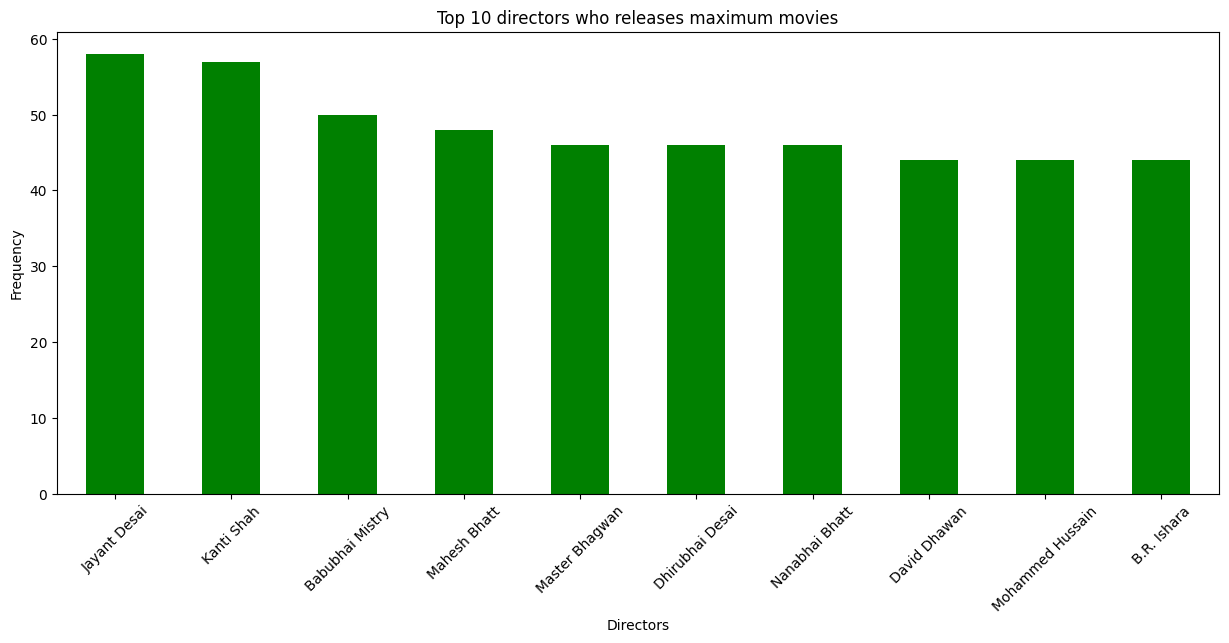

In [55]:
plt.figure(figsize = (15,6))
data['Director'].value_counts()[:10].plot(kind = 'bar', color = 'green')
plt.title("Top 10 directors who releases maximum movies")
plt.xlabel("Directors")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.show()

### Distribution of movie release

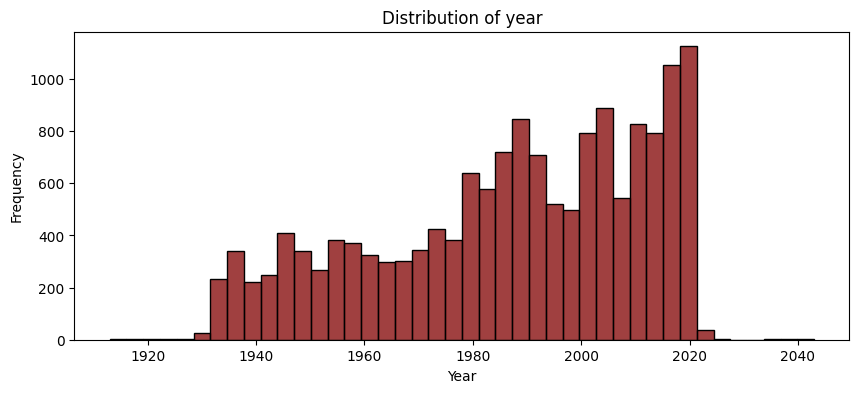

In [56]:
plt.figure(figsize = (10,4))
sns.histplot(data['Year'],color = 'maroon')
plt.title('Distribution of year')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

### Duration of movie

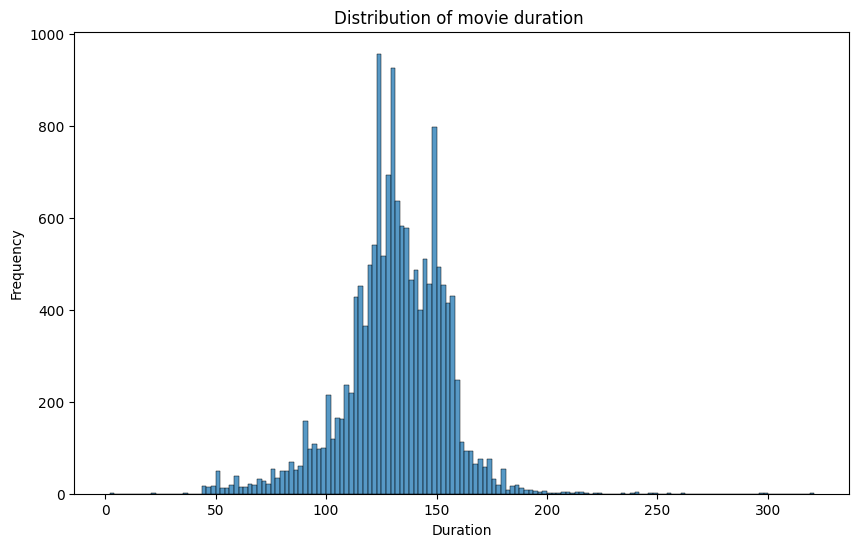

In [57]:
plt.figure(figsize = (10,6))
sns.histplot(data['Duration'])
plt.title("Distribution of movie duration ")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [58]:
df['Duration'].mean()

np.float64(128.1279182207487)

### Average duration of movie is 128 min

### Genre

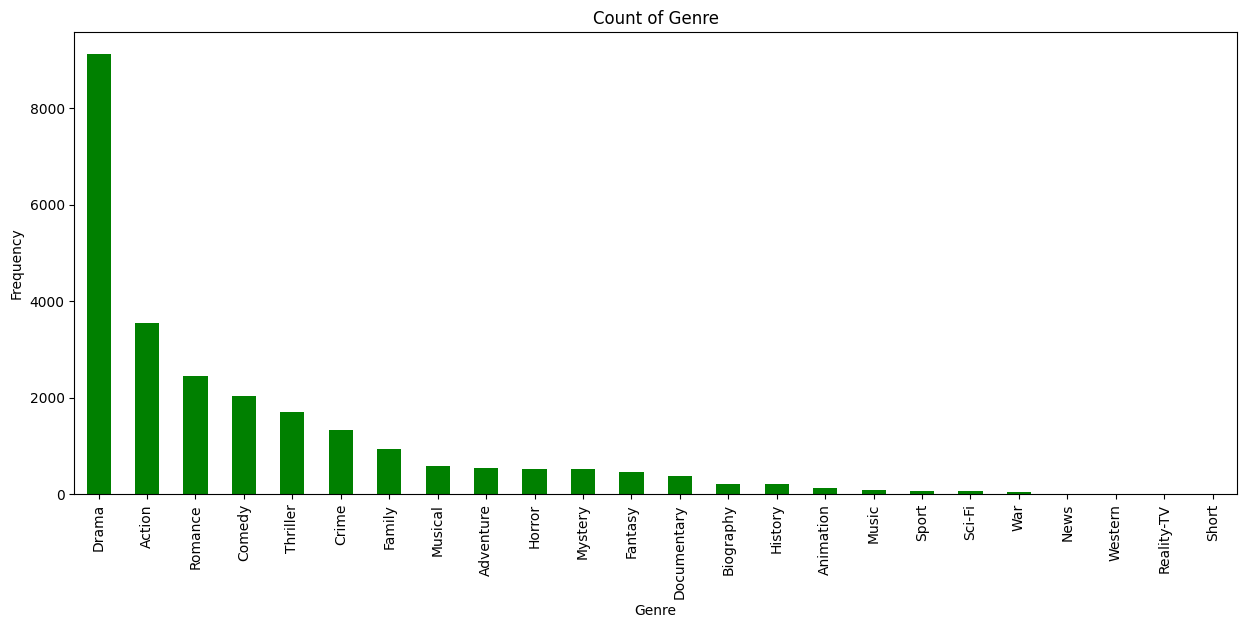

In [59]:
plt.figure(figsize = (15,6))
df_exploded['Genre'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Count of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

### Rating

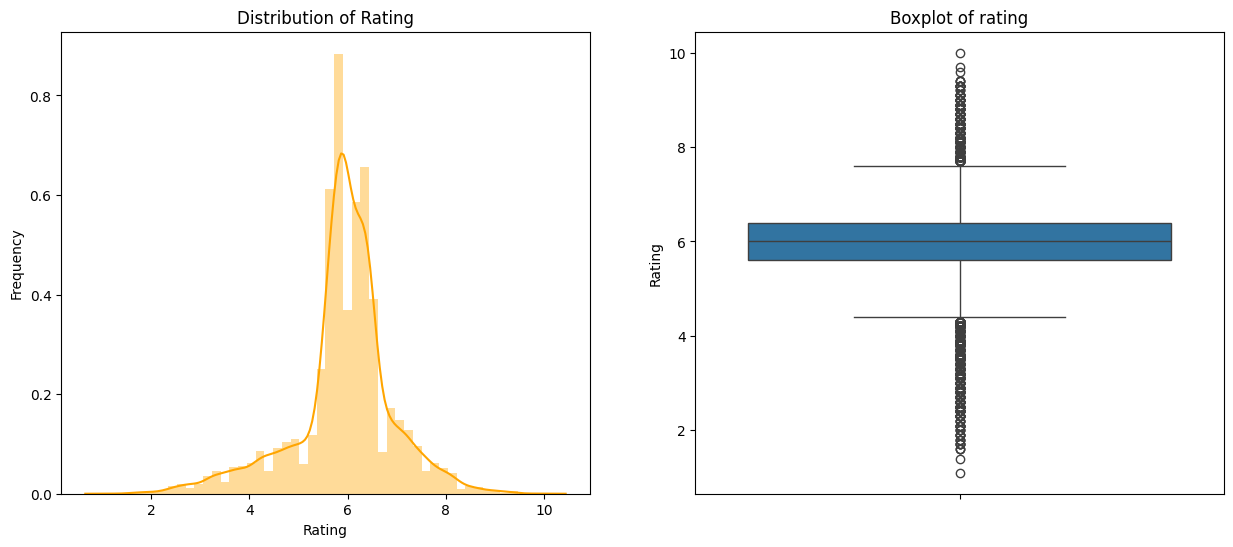

In [60]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(data['Rating'], color = 'orange')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(data['Rating'])
plt.title('Boxplot of rating')
plt.show()

### Votes

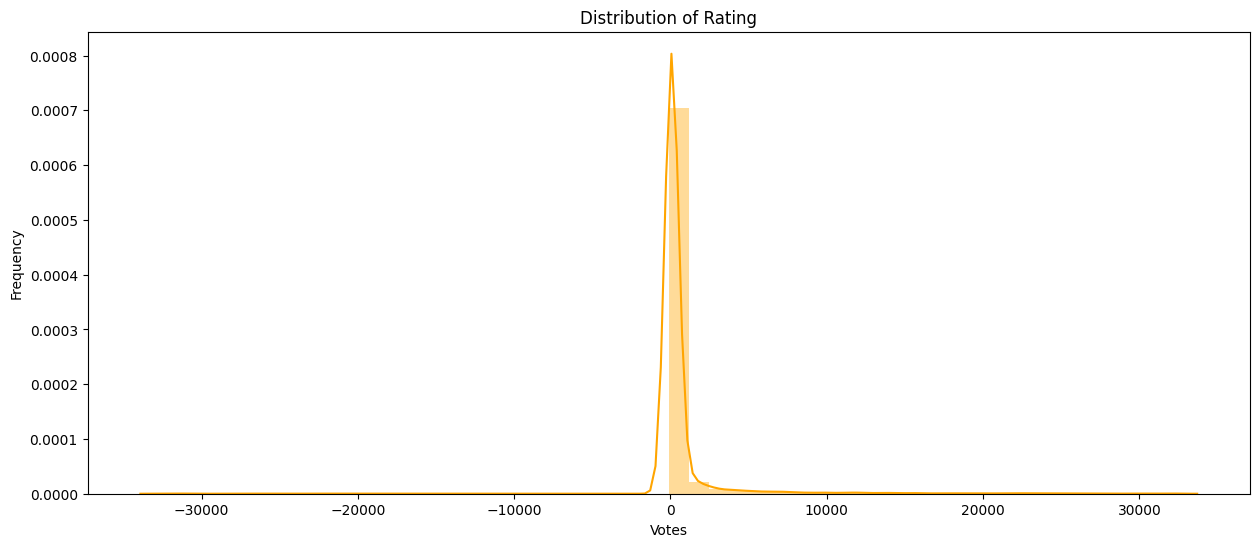

In [61]:
plt.figure(figsize = (15,6))

sns.distplot(data['Votes'], color = 'orange')
plt.title('Distribution of Rating')
plt.xlabel('Votes')
plt.ylabel('Frequency')

plt.show()

### Top 5 Actor 1

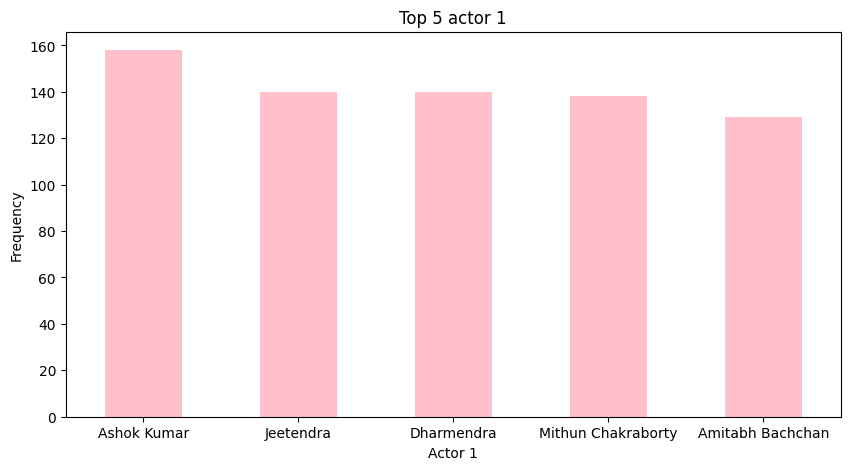

In [62]:
plt.figure(figsize = (10,5))
data['Actor 1'].value_counts()[:5].plot(kind = 'bar', color = 'pink')
plt.title('Top 5 actor 1')
plt.xlabel('Actor 1')
plt.ylabel('Frequency')
plt.xticks(rotation = 360)
plt.show()

### Top 5 Actor 2

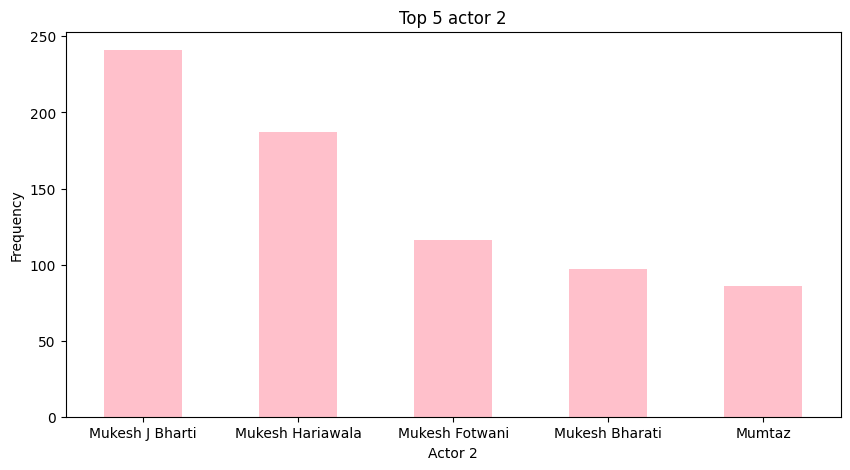

In [63]:
plt.figure(figsize = (10,5))
data['Actor 2'].value_counts()[:5].plot(kind = 'bar', color = 'pink')
plt.title('Top 5 actor 2')
plt.xlabel('Actor 2')
plt.ylabel('Frequency')
plt.xticks(rotation = 360)
plt.show()

### Top 5 Actor 3

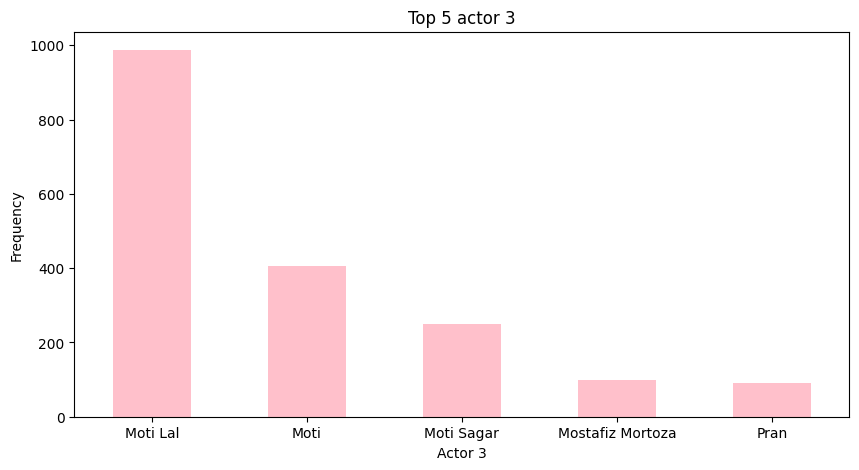

In [64]:
plt.figure(figsize = (10,5))
data['Actor 3'].value_counts()[:5].plot(kind = 'bar', color = 'pink')
plt.title('Top 5 actor 3')
plt.xlabel('Actor 3')
plt.ylabel('Frequency')
plt.xticks(rotation = 360)
plt.show()

## Bi-variate

In [65]:
# Create category of rating
data['Rating_Category'] = pd.cut(data['Rating'], bins=[0, 5, 8, 10], labels=['Low', 'Medium', 'High'])

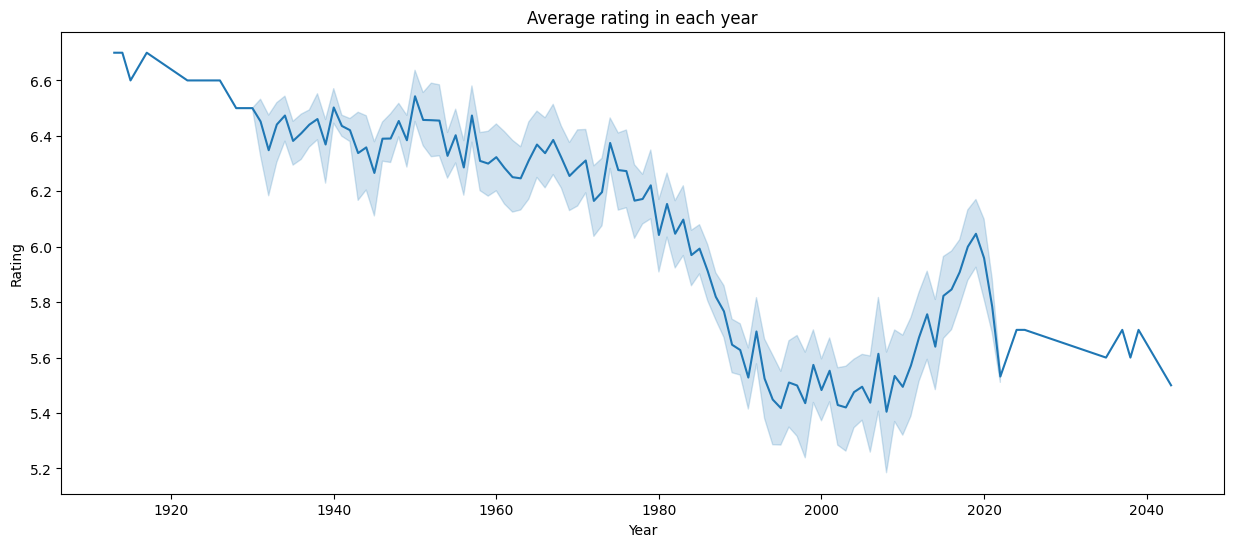

In [66]:
plt.figure(figsize = (15,6))
sns.lineplot(x = 'Year', y = 'Rating', data=data)
plt.title('Average rating in each year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

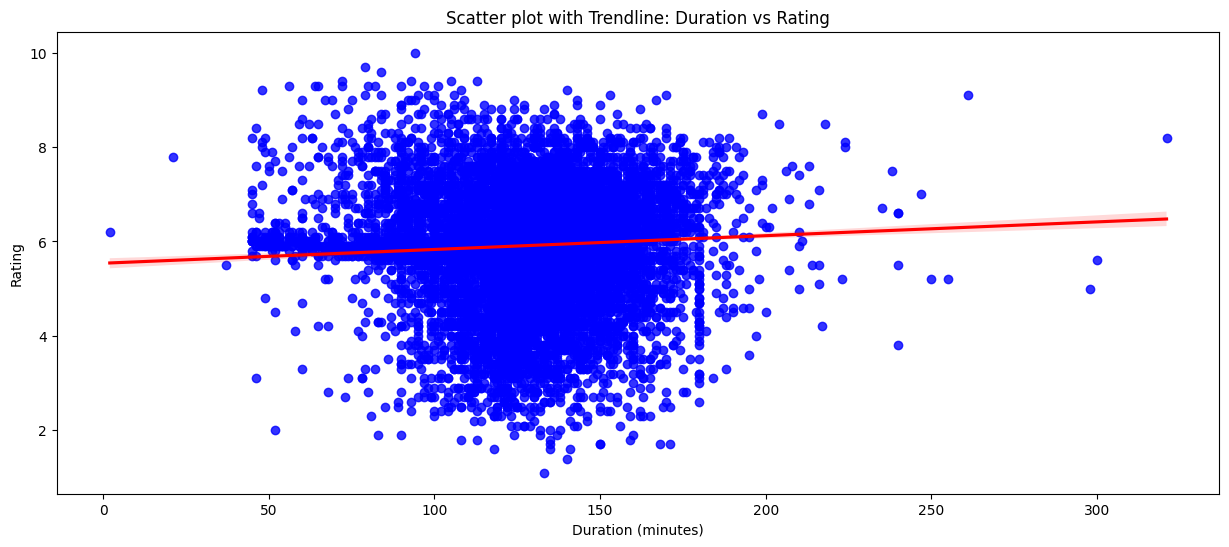

In [67]:
# Regression plot
plt.figure(figsize=(15,6))
sns.regplot(x='Duration', y='Rating', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Scatter plot with Trendline: Duration vs Rating")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.show()

### Duration do not have a significant impact on Rating.

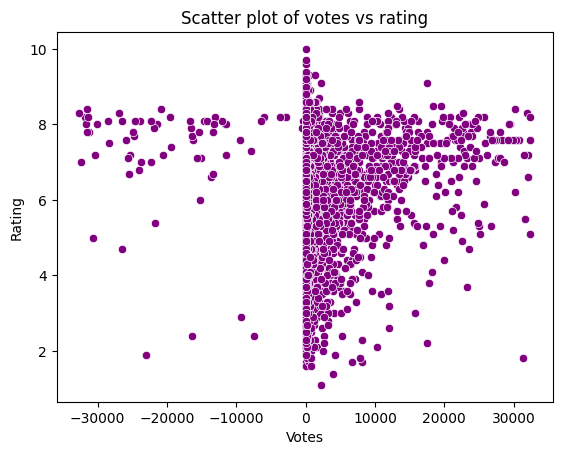

In [68]:
sns.scatterplot(x = 'Votes', y = 'Rating', data=data, color = 'purple')
plt.title("Scatter plot of votes vs rating")
plt.show()

### Votes do not have a significant impact on Rating.

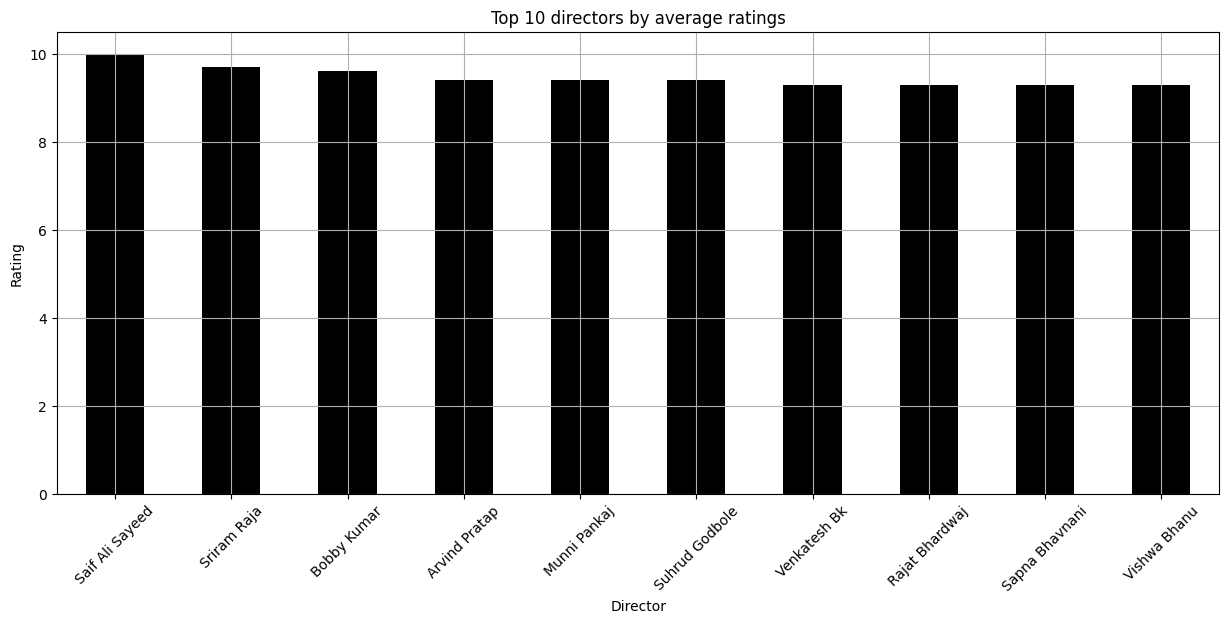

In [69]:
plt.figure(figsize = (15,6))
data.groupby(['Director'])['Rating'].mean().sort_values(ascending=False)[:10].plot(kind = 'bar', color = 'black')
plt.title("Top 10 directors by average ratings")
plt.xlabel("Director")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

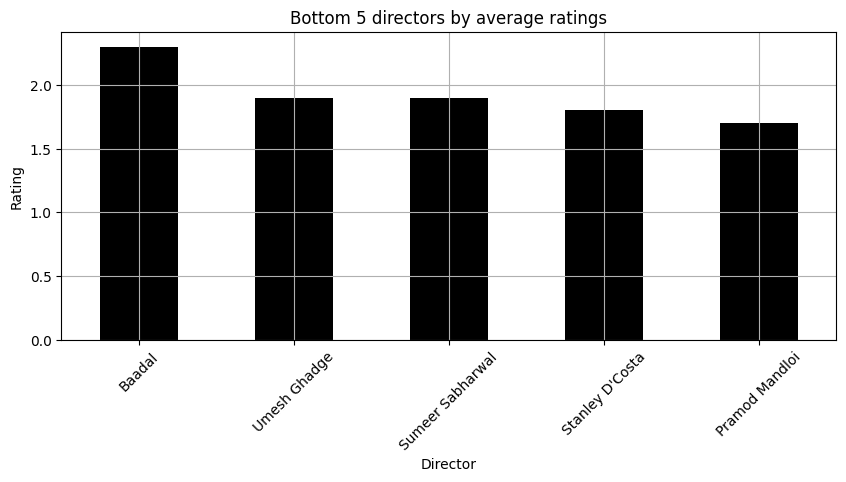

In [70]:
plt.figure(figsize = (10,4))
data.groupby(['Director'])['Rating'].mean().sort_values(ascending=False).tail().plot(kind = 'bar', color = 'black')
plt.title("Bottom 5 directors by average ratings")
plt.xlabel("Director")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

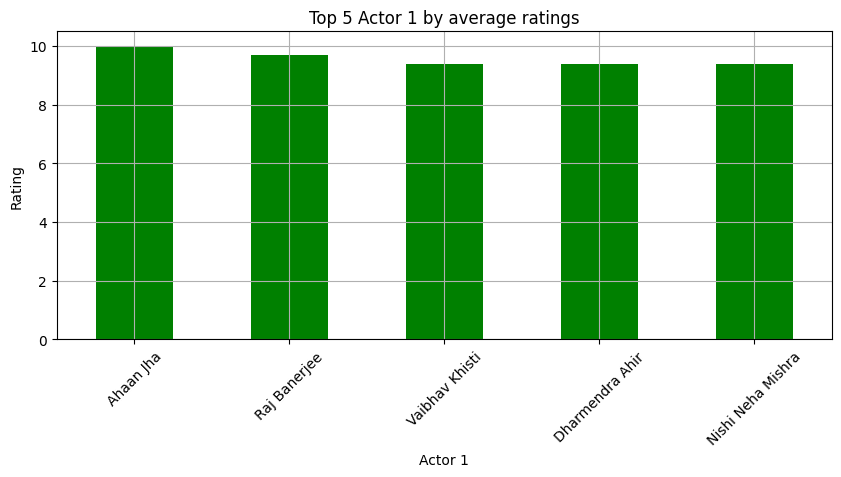

In [71]:
plt.figure(figsize = (10,4))
data.groupby(['Actor 1'])['Rating'].mean().sort_values(ascending=False)[:5].plot(kind = 'bar', color = 'green')
plt.title("Top 5 Actor 1 by average ratings")
plt.xlabel("Actor 1")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

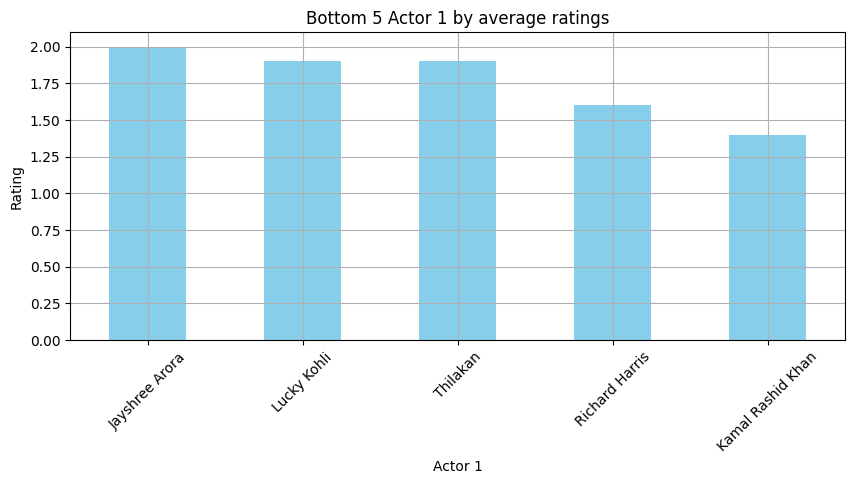

In [72]:
plt.figure(figsize = (10,4))
data.groupby(['Actor 1'])['Rating'].mean().sort_values(ascending=False).tail().plot(kind = 'bar', color = 'skyblue')
plt.title("Bottom 5 Actor 1 by average ratings")
plt.xlabel("Actor 1")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

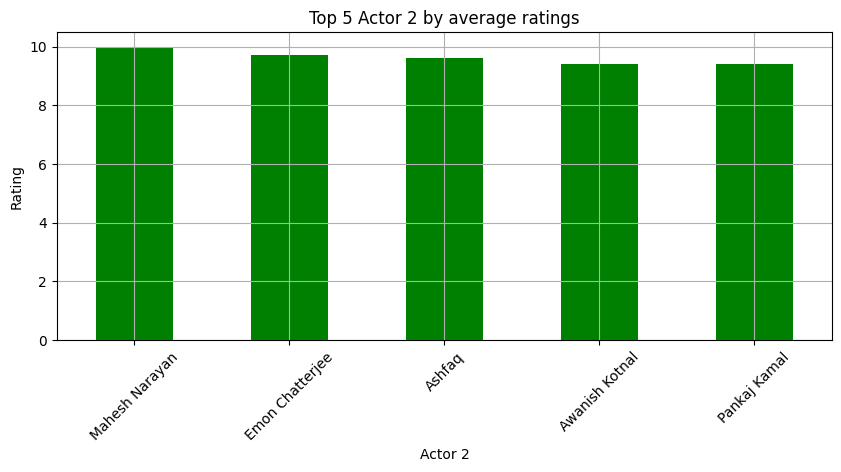

In [73]:
plt.figure(figsize = (10,4))
data.groupby(['Actor 2'])['Rating'].mean().sort_values(ascending=False)[:5].plot(kind = 'bar', color = 'green')
plt.title("Top 5 Actor 2 by average ratings")
plt.xlabel("Actor 2")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

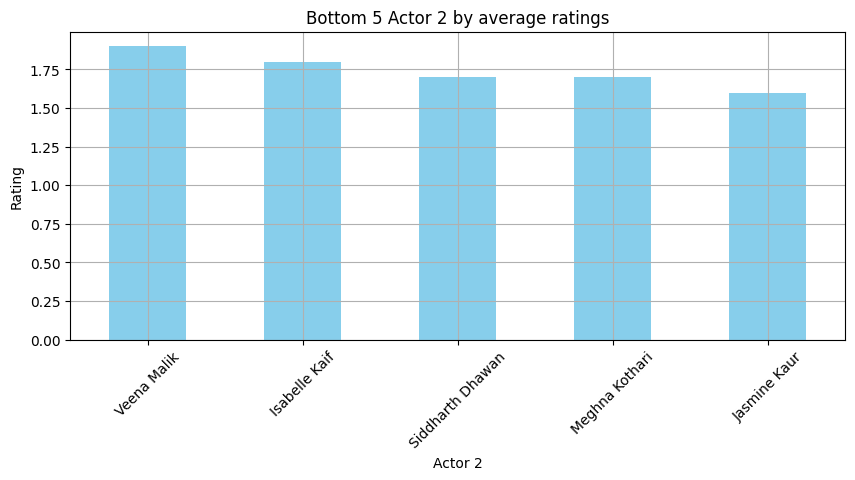

In [74]:
plt.figure(figsize = (10,4))
data.groupby(['Actor 2'])['Rating'].mean().sort_values(ascending=False).tail().plot(kind = 'bar', color = 'skyblue')
plt.title("Bottom 5 Actor 2 by average ratings")
plt.xlabel("Actor 2")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

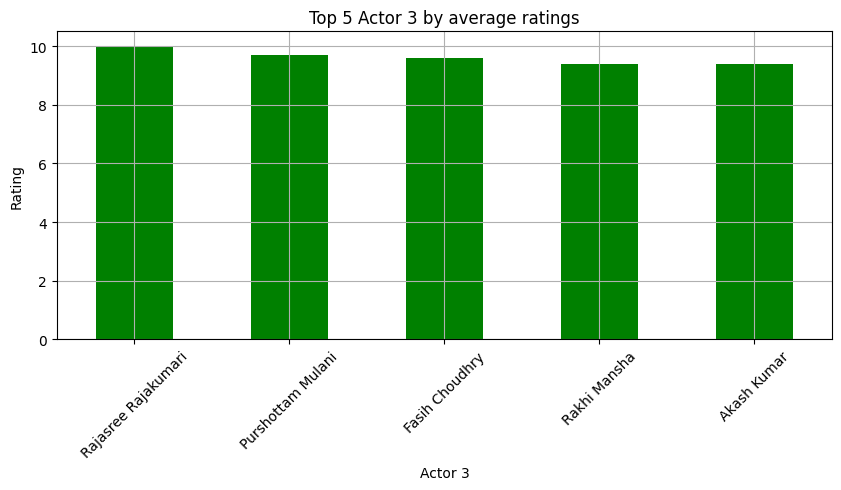

In [75]:
plt.figure(figsize = (10,4))
data.groupby(['Actor 3'])['Rating'].mean().sort_values(ascending=False)[:5].plot(kind = 'bar', color = 'green')
plt.title("Top 5 Actor 3 by average ratings")
plt.xlabel("Actor 3")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

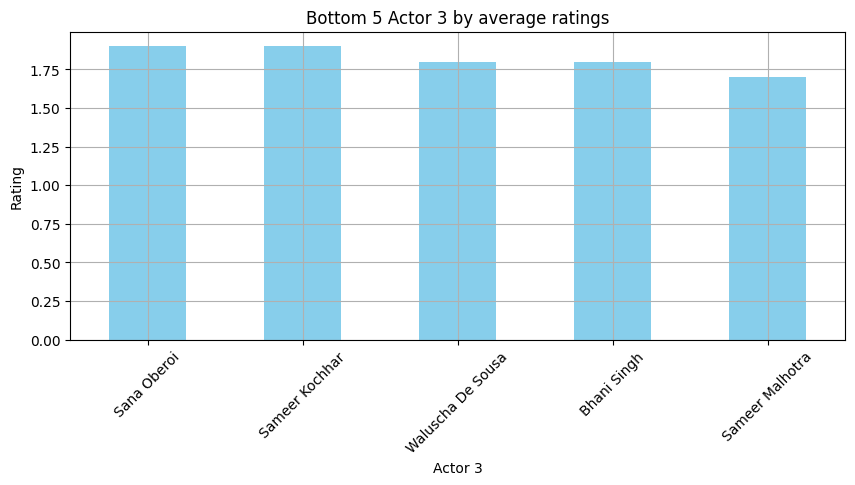

In [76]:
plt.figure(figsize = (10,4))
data.groupby(['Actor 3'])['Rating'].mean().sort_values(ascending=False).tail().plot(kind = 'bar', color = 'skyblue')
plt.title("Bottom 5 Actor 3 by average ratings")
plt.xlabel("Actor 3")
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Top-Rated Directors and Their Frequent Actors

In [77]:
# Filter directors with an average rating above 9
top_directors = data.groupby('Director')['Rating'].mean().reset_index()
top_directors = top_directors[top_directors['Rating'] > 9]

# Merge with the original dataframe to get actor details
top_directors_actors = data[data['Director'].isin(top_directors['Director'])][['Director', 'Actor 1', 'Actor 2', 'Actor 3']].reset_index(drop=True)

# Display the result
top_directors_actors

,Director,Actor 1,Actor 2,Actor 3
0,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
2,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
3,Kuldeep Ruhil,Kuldeep Ruhil,Mrinmayee Godbole,Moon Moon Sen
4,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
5,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
6,Akshat Gupt,Mayur Mehta,Moushumi Chatterjee,Motilal
7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
8,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
9,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


### Correlation between numerical features

In [78]:
numerical_col

['Year', 'Duration', 'Rating', 'Votes']

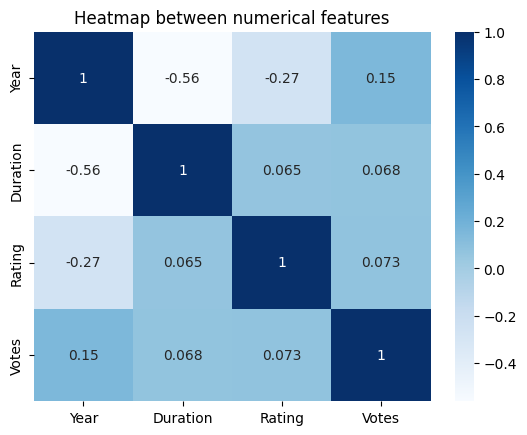

In [79]:
# Heatmap of numerical features
sns.heatmap(data[numerical_col].corr(), annot = True, cmap='Blues')
plt.title("Heatmap between numerical features")
plt.show()

### There is weak correlation between 'Year', 'Rating', 'Duration' and 'Votes'

### Analyzing the Impact of Actors and Directors on Ratings.

In [80]:
# Create a contingency table
contingency_table = pd.crosstab(data['Director'], data['Rating_Category'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Director and Rating.")
else:
    print("No significant relationship between Director and Rating.")


Chi-Square Statistic: 15981.18532465208
P-value: 1.7959708452969695e-128
There is a significant relationship between Director and Rating.


In [81]:
# Create a contingency table
contingency_table = pd.crosstab(data['Actor 1'], data['Rating_Category'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Actor 1 and Rating.")
else:
    print("No significant relationship between Actor 1 and Rating.")


Chi-Square Statistic: 13861.79342563689
P-value: 5.797181046064505e-176
There is a significant relationship between Actor 1 and Rating.


In [82]:
# Create a contingency table
contingency_table = pd.crosstab(data['Actor 2'], data['Rating_Category'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Actor 2 and Rating.")
else:
    print("No significant relationship between Actor 2 and Rating.")

Chi-Square Statistic: 14414.825928312954
P-value: 2.892591218765311e-185
There is a significant relationship between Actor 2 and Rating.


In [83]:
# Create a contingency table
contingency_table = pd.crosstab(data['Actor 3'], data['Rating_Category'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Actor 3 and Rating.")
else:
    print("No significant relationship between Actor 3 and Rating.")


Chi-Square Statistic: 14474.725556512898
P-value: 8.413107581137208e-202
There is a significant relationship between Actor 3 and Rating.


### Rating with respect to genre

In [84]:
data_exploded = data.assign(Genre=df['Genre'].str.split(', ')).explode('Genre').reset_index(drop = True)

In [85]:
data_exploded.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Name,Genre,Rating_Category
0,1986,132,5.9,70,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,,Drama,Medium
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,#Gadhvi (He thought he was Gandhi),Drama,Medium
2,2021,90,5.8,88,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,#Homecoming,Drama,Medium
3,2021,90,5.8,88,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,#Homecoming,Musical,Medium
4,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,#Yaaram,Comedy,Low


In [86]:
data_exploded.isna().sum()

Year                  0
Duration              0
Rating                0
Votes                 0
Director              0
Actor 1               0
Actor 2               0
Actor 3               0
Name                  0
Genre              1883
Rating_Category       0
dtype: int64

In [87]:
data_exploded['Genre'] = data_exploded['Genre'].fillna(data_exploded['Genre'].mode()[0])

In [88]:
data_exploded['Genre'].unique()

array(['Drama', 'Musical', 'Comedy', 'Romance', 'War', 'Documentary',
       'Horror', 'Mystery', 'Thriller', 'Action', 'Crime', 'Fantasy',
       'Family', 'Biography', 'History', 'Sport', 'Adventure', 'Sci-Fi',
       'Music', 'Animation', 'News', 'Western', 'Reality-TV', 'Short'],
      dtype=object)

In [89]:
# Create a contingency table
contingency_table = pd.crosstab(data_exploded['Genre'], data_exploded['Rating_Category'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Genre and Rating.")
else:
    print("No significant relationship between Genre and Rating.")


Chi-Square Statistic: 117.32061032976816
P-value: 3.754806950191151e-08
There is a significant relationship between Genre and Rating.


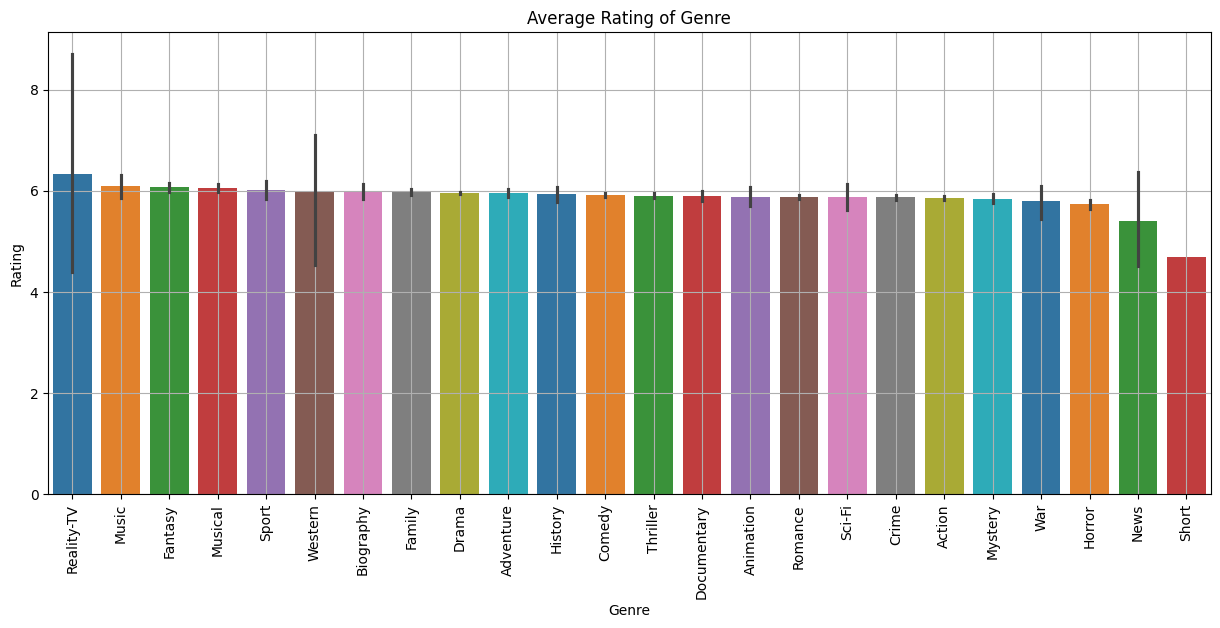

In [90]:
plt.figure(figsize = (15,6))


sorted_genres = data_exploded.groupby('Genre')['Rating'].mean().sort_values(ascending=False).index
sns.barplot(x = 'Genre', y = 'Rating', data = data_exploded, palette = 'tab10', order = sorted_genres)

plt.title('Average Rating of Genre')
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Final dataset with selected features

In [91]:
final_data = data_exploded.drop(['Name','Year','Duration','Votes','Rating_Category'], axis=1)

In [92]:
final_data.head()

,Rating,Director,Actor 1,Actor 2,Actor 3,Genre
0,5.9,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama
1,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
2,5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama
3,5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Musical
4,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy


In [93]:
final_data.shape

(24939, 6)

In [94]:
# Mean encoding
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']:
    mean_encoding = final_data.groupby(col)['Rating'].mean()
    final_data[col + '_mean_enc'] = final_data[col].map(mean_encoding)

In [95]:
final_data.head()

,Rating,Director,Actor 1,Actor 2,Actor 3,Genre,Director_mean_enc,Actor 1_mean_enc,Actor 2_mean_enc,Actor 3_mean_enc,Genre_mean_enc
0,5.9,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,5.766667,6.225,5.583333,5.70,5.960645
1,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,7.000000,6.775,7.000000,7.00,5.960645
2,5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,5.800000,6.125,6.980000,5.80,5.960645
3,5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Musical,5.800000,6.125,6.980000,5.80,6.057216
4,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,4.400000,5.250,4.400000,4.45,5.917110


In [96]:
# Train-test split
from sklearn.model_selection import train_test_split

x = final_data.drop(['Rating','Director','Actor 1','Actor 2','Actor 3','Genre'], axis=1)
y = final_data['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [97]:
x_train.shape, y_train.shape

((17457, 5), (17457,))

In [98]:
x_test.shape, y_test.shape

((7482, 5), (7482,))

In [99]:
x_train.head()

,Director_mean_enc,Actor 1_mean_enc,Actor 2_mean_enc,Actor 3_mean_enc,Genre_mean_enc
11271,6.660000,6.454412,6.162500,6.087500,5.968399
5562,6.128889,6.400000,6.280952,6.086460,5.902747
21048,5.900000,5.900000,5.900000,5.900000,5.733397
1690,4.000000,4.850000,4.000000,5.307407,5.960645
20731,6.350000,5.351598,5.462500,6.071429,5.917110


In [102]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Regression models
models = {
    'Random Forest': RandomForestRegressor(random_state=1),
    'XGBoost': XGBRegressor(random_state=1),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'KNN': KNeighborsRegressor(n_neighbors=4)
}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)

    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    results[name] = {'MAE': mae, 'R² Score': r2}
    print(f"{name} - MAE: {mae:.4f}, R² Score: {r2:.4f}")

Random Forest - MAE: 0.0833, R² Score: 0.9757
XGBoost - MAE: 0.1981, R² Score: 0.9018
Decision Tree - MAE: 0.0010, R² Score: 0.9992
KNN - MAE: 0.2255, R² Score: 0.8563


In [ ]:
# ensemble technique
from sklearn.ensemble import StackingRegressor

base_models = [
    ('rf', RandomForestRegressor(random_state=1)),
    ('xgb', XGBRegressor(random_state=1)),
    ('dt', DecisionTreeRegressor(random_state=1))
]

meta_model = RandomForestRegressor(random_state=1)

stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking.fit(x_train, y_train)
y_pred_stack = stacking.predict(x_train)
print("Stacking R² Score:", r2_score(y_train, y_pred_stack))

### Random Forest is the best model, while Decision Tree tends to overfit

In [ ]:
# Check accuracy on test model using RandomForestRegressor
RandomForest = RandomForestRegressor(random_state=1)
RandomForest.fit(x_train,y_train)

y_pred = RandomForest.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
r2